In [1]:
    %load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import cv2
import sys
sys.path.append("/M3")
from M3 import m3F as m3F
from M3 import m3Face as m3Face
from M3 import m3HoughCircle as m3HoughCircle
from M3 import m3Batch as m3Batch
from M3 import m3Pre as m3Pre
from M3 import m3Mask as m3Mask
from M3 import m3HoughCircle as m3HoughCircle
from M3 import m3MedianFilter, m3Denoising, retinexRunnable, m3Contrast, m3tv, m3Mask
from M3 import m3Batch as m3Batch
from M3 import m3Show as m3Show
import numpy as np
import cv2
'''
fArray = {retinexRunnable.runMSRCP: {"inputImg": "ignorethis", "show": False},
         m3Face.findEyes: {"inputImg": "ignorethis", "show": False}, 
         m3MedianFilter.medianFilter: {"inputImg": "ignore", "show": False},
         m3F.getRed: {"inputImg": "ignorethis", "show": False},
         #m3Contrast.contrast: {"inputImg": "ignore", "show": False},
         m3tv.denoise_tv_chambolle: {"inputImg": "ignorethis", "weight": 0.1,"eps": 0.0002,"n_iter_max": 200, "multichannel": False, "show": False},
         m3HoughCircle.findCircleSimple: {"inputImg": "ignorethis", "show": False},
         m3Mask.makeCircularOutline: {"inputImg": "ignorethis", "show": False},
         m3Mask.fullImgEyeOutline: {"inputImg": "ignorethis", "show": True}
         #m3Batch.makeComparison: {"faceArray": "ignoreThis", "fileName": "nielzsimpleplusmalte3"}
          
         }
         '''
'''
fArray = {
    m3Face.findEyes: {"inputImg": "ignorethis", "show": False}, 
    retinexRunnable.runMSRCP: {"inputImg": "ignorethis", "show": True},
    m3MedianFilter.medianFilter: {"inputImg": "ignore", "show": True},
#   m3Denoising.denoise: {"inputImg": "ignore", "show": False},
     m3F.getRed: {"inputImg": "ignorethis", "show": True},
    m3Contrast.contrast: {"inputImg": "ignore", "show": False},
    m3HoughCircle.findCircleSimple: {"inputImg": "ignorethis", "show": True}}
'''

fArray = {retinexRunnable.runMSRCP: {"inputImg": "ignorethis", "show": False},
         m3Face.findEyes: {"inputImg": "ignorethis", "show": False}, 
         m3MedianFilter.medianFilter: {"inputImg": "ignore", "show": False},
         m3F.getRed: {"inputImg": "ignorethis", "show": False},
         #m3Contrast.contrast: {"inputImg": "ignore", "show": False},
         m3tv.denoise_tv_chambolle: {"inputImg": "ignorethis", "weight": 0.1,"eps": 0.0002,"n_iter_max": 200, "multichannel": False, "show": False},
         m3HoughCircle.findCircleSimple: {"inputImg": "ignorethis", "show": False},
         m3Mask.makeCircularOutline: {"photo": "ignorethis", "show": True},
         m3Mask.fullImgEyeOutline: {"photo": "ignorethis", "show": True}
         #m3Batch.makeComparison: {"faceArray": "ignoreThis", "fileName": "nielzsimpleplusmalte3"}
          
         }

doing batchprocess for folder of images
PICTURES/InputPictures/single/couple.jpeg
L AND R[1380, 1501, 1536, 1598] [1654, 1388, 1810, 1485]
[<M3.m3Class.Face object at 0x1c228bbba8>, <M3.m3Class.Face object at 0x1c228bbb70>]
findeyes otu [<M3.m3Class.Face object at 0x1c228bbba8>, <M3.m3Class.Face object at 0x1c228bbb70>]
function name  runMSRCP
was inputImg
Doing an eye with runMSRCP
Doing an eye with runMSRCP
Doing an eye with runMSRCP
Doing an eye with runMSRCP
function name  medianFilter
was inputImg
Doing an eye with medianFilter
medianFilter(inputImg, show) [[[ 44  45  64]
  [ 36  38  55]
  [ 25  26  39]
  ...
  [ 97 146 255]
  [ 85 132 254]
  [ 29  89 255]]

 [[ 79  81 107]
  [ 47  49  69]
  [ 25  25  40]
  ...
  [ 81 135 255]
  [ 61 115 255]
  [ 71 122 255]]

 [[ 88  88 118]
  [ 40  40  61]
  [ 40  40  61]
  ...
  [ 65 121 255]
  [ 41 101 255]
  [ 79 127 255]]

 ...

 [[ 33  53 161]
  [ 78 107 230]
  [ 92 115 241]
  ...
  [ 89  97 168]
  [101 109 181]
  [ 92 100 170]]

 [[ 62  86

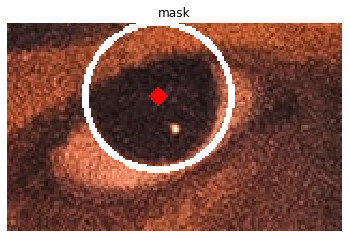

i [72 32 35]


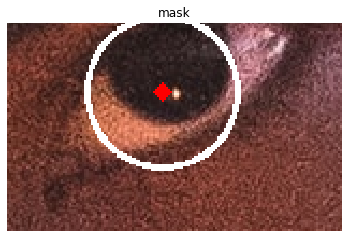

i [78 52 24]


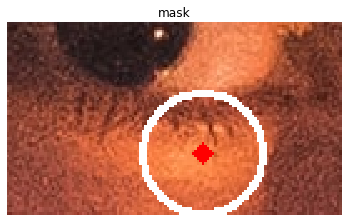

i [70 46 28]


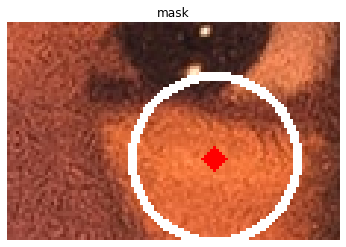

function name  fullImgEyeOutline
was photo
Doing an PHOTO with fullImgEyeOutline
i [70 34 34]
coor [1380, 1501, 1536, 1598]
i [72 32 35]
coor [1654, 1388, 1810, 1485]
i [78 52 24]
coor [1084, 2130, 1218, 2207]
i [70 46 28]
coor [1306, 2139, 1419, 2213]


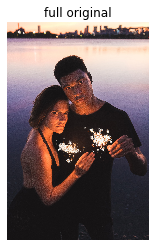

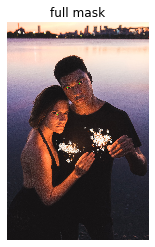

gray type:  <class 'numpy.ndarray'>


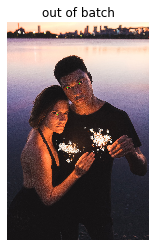

array([[[202, 223, 254],
        [202, 223, 254],
        [202, 223, 254],
        ...,
        [224, 244, 255],
        [224, 244, 255],
        [224, 244, 255]],

       [[202, 223, 254],
        [202, 223, 254],
        [202, 223, 254],
        ...,
        [224, 244, 255],
        [224, 244, 255],
        [224, 244, 255]],

       [[202, 223, 254],
        [202, 223, 254],
        [202, 223, 254],
        ...,
        [222, 244, 255],
        [222, 244, 255],
        [222, 244, 255]],

       ...,

       [[ 19,  18,  20],
        [ 20,  19,  21],
        [ 21,  20,  22],
        ...,
        [ 48,  49,  53],
        [ 47,  48,  52],
        [ 50,  51,  55]],

       [[ 20,  19,  21],
        [ 21,  20,  22],
        [ 21,  20,  22],
        ...,
        [ 50,  51,  55],
        [ 47,  48,  52],
        [ 49,  50,  54]],

       [[ 20,  19,  21],
        [ 21,  20,  22],
        [ 21,  20,  22],
        ...,
        [ 52,  53,  57],
        [ 46,  47,  51],
        [ 47,  48,  52]]

In [33]:
gray = m3Batch.batchProcess3("PICTURES/InputPictures/single/", fArray, False, exportAs="live")
print("gray type: ", type(gray))
m3Show.imshow(gray,"out of batch")

doing batchprocess for single image
None
 found no faces in this picture\]


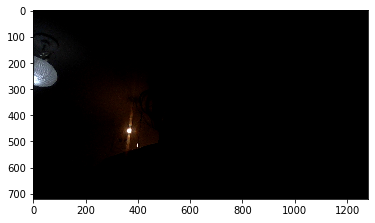

[]
findeyes otu []
function name  runMSRCP
was inputImg
function name  medianFilter
was inputImg
function name  getRed
was inputImg
function name  denoise_tv_chambolle
was inputImg
function name  findCircleSimple
was inputImg
function name  makeCircularOutline
was photo


AttributeError: 'Photo' object has no attribute 'wip'

In [2]:

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = m3Batch.batchProcess3(frame, fArray, False, exportAs="live")
    print(type(gray))
   # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    if (type(gray) is not type(None)):
        if (len(gray.shape) > 0):
            cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()